**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

**Import data**

In [2]:
data = pd.read_csv("C:\Users\sonja tilly.ABERDEEN\\MLrolling5Yrtns.csv")
data = data.set_index('Name')
data = data.fillna(0)
data.head(1)

,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,...,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17
Name,,,,,,,,,,,,,,,,,,,,,
Aberdeen Corporate Bond A Ac,1.57,0.09,-0.43,0.86,0.94,3.98,1.06,1.61,1.11,1.49,...,0.75,0.71,2.01,4.76,3.65,-1.08,-3.78,-1.4,1.95,-1.09


**Perform PCA on data to reduce the dimensions and produce 2D data**

In [3]:
X=data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


results = pd.DataFrame(X_pca, index=data.index, columns=['Factor1','Factor2'])

results.head()

,Factor1,Factor2
Name,,
Aberdeen Corporate Bond A Ac,3.374630,-2.178111
Aberdeen Sterling Long Dated Corporate Bond A Acc,-2.970331,6.099475
Aberdeen Sterling Short Dated Corporate Bond A Acc,-9.304355,2.124659
Alliance Trust Monthly Income Bond B Acc,-1.628642,-6.108987
Alliance Trust SF Corporate Bond SC2,1.766268,-2.843686


**Apply KMeans to reduced data**

In [25]:
def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k, random_state=47).fit(X_pca)
    centroids = clusterer.cluster_centers_
    labels = clusterer.labels_
    score = silhouette_score(X_pca, clusterer.labels_, metric='euclidean')
    samples_score = silhouette_samples(X_pca, clusterer.labels_, metric='euclidean')
    return centroids, labels, score, samples_score

for i in range(2,10):
    centroids, labels, score, samples_score = clusterKMeans(i)
    print "The silhouette score for "+ str(i) + " clusters is: {:.3}.".format(score)

The silhouette score for 2 clusters is: 0.504.
The silhouette score for 3 clusters is: 0.542.
The silhouette score for 4 clusters is: 0.537.
The silhouette score for 5 clusters is: 0.564.
The silhouette score for 6 clusters is: 0.57.
The silhouette score for 7 clusters is: 0.555.
The silhouette score for 8 clusters is: 0.552.
The silhouette score for 9 clusters is: 0.439.


*Six clusters yield the highest silhouette score.*

**Preparing data for plotting**

In [5]:
for i in range(6,7):
    centroids, labels, score = clusterKMeans(i)
    
dat=pd.DataFrame(X_pca,columns=['Factor1','Factor2'])
dat['Cluster']=labels
dat['Name']=data.index
dat.head(1)

,Factor1,Factor2,Cluster,Name
0,3.37463,-2.178111,1,Aberdeen Corporate Bond A Ac


In [6]:
#set colours
colour_dict = {0:'goldenrod', 1:'cyan', 2:'limegreen', 3:'blue', 4:'blueviolet', 5:'maroon', 6:'darkorange', 7:'indigo'}
dat['Colour'] = dat['Cluster'].map(colour_dict)
dat['Colour'].iloc[131:141]='magenta'

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#add centroid coordinates for each cluster
centroidsx = {0:centroids[0:1,0], 1:centroids[1:2, 0], 2:centroids[2:3, 0], 3:centroids[3:4, 0], 4: centroids[4:5, 0], 5: centroids[5:6, 0], 6: centroids[6:7, 0], 7: centroids[7:8, 0]}
centroidsy = {0:centroids[0:1,1], 1:centroids[1:2, 1], 2:centroids[2:3, 1], 3:centroids[3:4, 1], 4: centroids[4:5, 1], 5: centroids[5:6, 1], 6: centroids[6:7, 1], 7: centroids[7:8, 1]}
dat['Centroidx'] = dat['Cluster'].map(centroidsx)
dat['Centroidy'] = dat['Cluster'].map(centroidsy)
dat.tail(1)

,Factor1,Factor2,Cluster,Name,Colour,Centroidx,Centroidy
135,-3.52334,3.775185,2,BofA ML UK Gilts 1-10 Year TR GBP,magenta,[-1.83960661715],[5.50972307109]


**Plot factors and clusters**

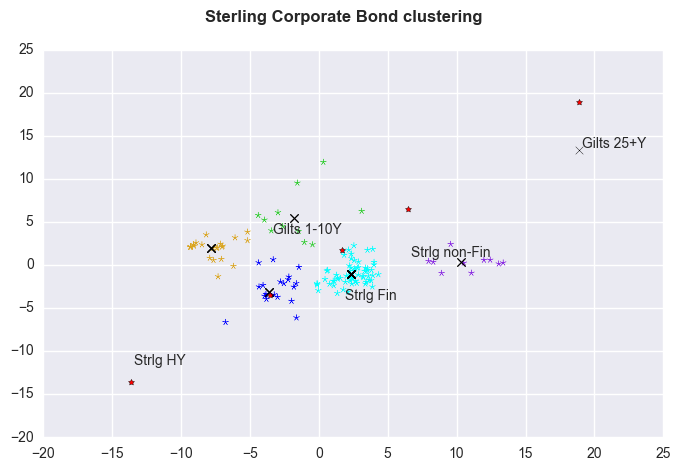

In [8]:
fig = plt.figure(figsize=(8,5))
plt.style.use('seaborn-deep')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-20, 25)
plt.ylim(-20, 25)
plt.rcParams.update({'font.size': 10})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax1.scatter(dat['Factor1'].iloc[:131], dat['Factor2'].iloc[:131], c=dat['Colour'], marker=(5,2), label='')
ax2.scatter(dat['Centroidx'], dat['Centroidy'], s=30, c='k', marker="x", label='')
ax3.scatter(dat['Factor1'].iloc[131:136],dat['Factor1'].iloc[131:136], c='red', marker=(5,1), label='fx income indices')

fig.suptitle('Sterling Corporate Bond clustering', fontsize=12, fontweight='bold')

ax3.annotate('Strlg non-Fin',xy=(dat['Factor1'].iloc[131:132],dat['Factor2'].iloc[131:132]), xytext=(3,2),textcoords='offset pixels')
ax3.annotate('Strlg Fin',xy=(dat['Factor1'].iloc[132:133],dat['Factor2'].iloc[132:133]), xytext=(3,2),textcoords='offset pixels')
ax3.annotate('Strlg HY',xy=(dat['Factor1'].iloc[133:134],dat['Factor2'].iloc[133:134]), xytext=(3,2),textcoords='offset pixels')
ax3.annotate('Gilts 25+Y',xy=(dat['Factor1'].iloc[134:135],dat['Factor2'].iloc[134:135]), xytext=(3,2),textcoords='offset pixels')
ax3.annotate('Gilts 1-10Y',xy=(dat['Factor1'].iloc[135:136],dat['Factor2'].iloc[135:136]), xytext=(3,-1),textcoords='offset pixels')

plt.show()

**Interpreting KMeans clusters**

In [9]:
# Which funds are clustered together? Look at the funds in each cluster.

cluster0 = dat[(dat['Cluster']==0)]
cluster1 = dat[(dat['Cluster']==1)]
cluster2 = dat[(dat['Cluster']==2)]
cluster3 = dat[(dat['Cluster']==3)]
cluster4 = dat[(dat['Cluster']==4)]
cluster5 = dat[(dat['Cluster']==5)]
cluster6 = dat[(dat['Cluster']==6)]

**Conclusion: what do the clusters tell us?**

*The clusters indicates what segments of the sterling bond market best describe each fund's returns over five years and groups funds accordingly.*

Cluster 0 (goldenrod) contains mainly short duration corporate bond funds.

Cluster 1 (cyan) contains corporate bond funds benchmarked to the broad market ("plain vanilla corporate bond funds"). Returns of this group are closely correlated to financials, which can be partly explained by the index containing a large portion of them (c 40%), partly by the majority of funds being overweight financials.

Cluster 2 (limegreen) contains corporate bond funds whose returns are correlated to 1-10Y maturity gilts.

Cluster 3 (blue) contains funds whose returns have affinity to higher yielding assets such as high yield or financials.

Cluster 4 (blueviolet) contains funds whose returns have affinity to longer-dated gilts and non-financials.

Cluster 5 only contains long-dated gilt index.

Cluster 6 is empty - this is somewhat strange, as the silhouette score was highest at six clusters?!